For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.



<h3 style="color:blue">Import Libraries</h3>

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

<h3 style="color:blue">Load dataset</h3>

In [109]:

tc = pd.read_csv('titanic.csv')
tc.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3 style="color:blue">Basic info about the columns</h3>

In [9]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h3 style="color:blue">Description of the data</h3>

In [110]:
tc.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3 style="color:blue">Find duplicate rows</h3>

In [111]:
tc.duplicated().sum()

0

<h3 style="color:blue">Find missing values and replace them</h3>

In [112]:
tc.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<b style="color:green"> Based on the above table Age, Cabin and Embark have null values </br>
so we take a further look at the columns and we start with Embark which has 2 missing values. we look for the value that occurs the most often for that column and we find out that it is "S" so we replace the missing values with "S"</b>

In [113]:
tc["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [114]:
tc["Embarked"].replace(np.nan,"S",inplace = True)
tc["Embarked"].isnull().sum()

0

<b style="color:green">now, we look at the cabin column. There are 687 missing values. The values that occur the most often in Cabin are 3 ('G6', 'C23 C25 C27', 'B96 B98') so it is better not to replace the missing Cabin values with any other value as there is no clear dominant Cabin. Also the column will not be needed for the purposes of our analysis</b>

In [115]:
tc["Cabin"].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
D              3
              ..
B42            1
D10 D12        1
D46            1
E10            1
A16            1
Name: Cabin, Length: 147, dtype: int64

<b style="color:green">Now, we look at the third and last column with missing values which is Age. there are 177 rows with missing ages. this is more than 10% of the data so deleting the rows is not a good solution. therefore, we try to replace the null values with the mean of the ages that have the same survival, PClass and gender values</b>

In [116]:
groupColumns = ['Survived','Pclass','Sex']
tc['Age'] = tc['Age'].fillna(tc.groupby(groupColumns)['Age'].transform('mean'))
tc["Age"].isnull().sum()

0

 <h2 style="color:blue">survival rate's association with the class of passenger</h2>

In [117]:
pclass_survival_table= pd.crosstab(tc['Pclass'], tc['Survived'])
pclass_survival_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:title={'center':'no of survivals and deaths by Pclass'}, xlabel='Pclass', ylabel='no of passengers'>

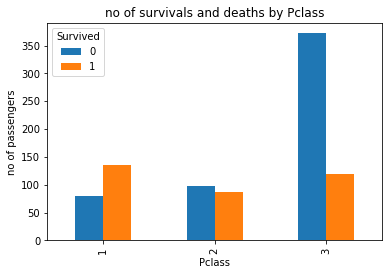

In [119]:
pclass_survival_table.plot(kind='bar', ylabel="no of passengers", title="no of survivals and deaths by Pclass")

In [27]:
pclass_survival_table2 = tc[["Pclass", "Survived"]].groupby("Pclass")["Survived"].mean()
pclass_survival_table2

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:title={'center':'Survival rate by Pclass'}, xlabel='Pclass', ylabel='survival rate'>

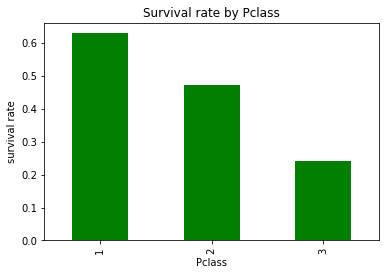

In [123]:
pclass_survival_table2.plot(kind='bar',ylabel="survival rate", title="Survival rate by Pclass", color="green")

<h3 style="color: red">based on the results above, we can see that class 1 passengers have a better rate of survival than any of the other 2 classes and class 2 passengers' survival rate is double the survival rates of class 3 passengers. both bar graphs also confirm the same finding: there were more survivals among class 1 passengers than deaths and the number started decreased in classes 2 and 3 where the number of deaths is 3 times more than the number survivors</h3>

In [52]:
stats.chi2_contingency(pclass_survival_table)

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

<h3 style="color:red">The chi-square value is another way to prove the association between the 2 categorical variables and the above method shows that degree of freedom is 2 so the decision point is 5.99. then, we compare  the chi-square value (102.88) with the DP (5.99) and find out that it is a lot greater than the decision point, we can conclude that there is a strong relationship between the pclass and survival rate which confirms my findinds based on the graphs</h3>

 <h2 style="color:blue"> Survival rate's association with the gender</h2>


In [34]:
gender_survival_table = pd.crosstab(tc['Sex'], tc['Survived'])
gender_survival_table

Survived,0,1
Sex,,
female,81,233
male,468,109


<AxesSubplot:title={'center':'no of survivals vs deaths by gender'}, xlabel='Sex', ylabel='no of passengers'>

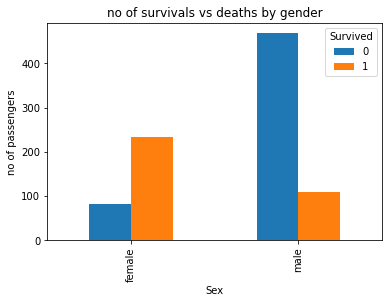

In [57]:
gender_survival_table.plot(kind='bar',ylabel="no of passengers",title="no of survivals vs deaths by gender")

In [58]:
gender_survival_table2 = tc[["Sex", "Survived"]].groupby("Sex")["Survived"].mean()
gender_survival_table2

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:title={'center':'survival rate by gender'}, xlabel='Sex', ylabel='survival rate'>

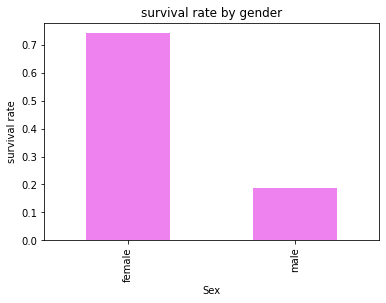

In [124]:
gender_survival_table2.plot(kind='bar',ylabel="survival rate",title="survival rate by gender", color="violet")

<h3 style="color:red">the survival rate among females (74%) is way higher than the survival rate (18%) among males and the bar graphs show that. In fact, the number of females who survived are 3 times the number of females that died. However the the number of males who died was 4 times the number of males who survived.</h3>

In [50]:
stats.chi2_contingency(gender_survival_table)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

<h3 style="color:red">The chi-square value is another way to prove the association between the 2 categorical variables and the above method shows that degree of freedom is 1 so the decision point is 3.84. then, we compare  the chi-square value (260.71) with the DP (3.84) and find out that it is a lot greater than the decision point, we can conclude that there is a very strong relationship between the gender and survival rate which confirms my findinds based on the graphs</h3>

 <h2 style="color:blue">Survival rate's association with the age</h2>

In [60]:
tc["Age"].nunique()

88

<h3 style="color:green">since there are 88 unique values in the age column we cannot and both columns are considered categorical, we divide the ages into 5 equal groups, that way the results can be better interpreted</h3>

<h3 style="color:orange">1. binning the age column into 5 equal groups</h3>

In [37]:
tc["Age"].corr(tc["Survived"])
tc["AgeCategory"] = pd.cut(tc["Age"], 5)
tc.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]"


<h3 style="color:orange"> 2. analyzing the rates of survival based on the new AgeCategory column</h3

In [41]:
age_survival_table = tc[["AgeCategory", "Survived"]].groupby("AgeCategory")["Survived"].mean()
age_survival_table

AgeCategory
(0.34, 16.336]      0.550000
(16.336, 32.252]    0.369942
(32.252, 48.168]    0.404255
(48.168, 64.084]    0.434783
(64.084, 80.0]      0.090909
Name: Survived, dtype: float64

<AxesSubplot:title={'center':'survival rate by age category'}, xlabel='AgeCategory', ylabel='survival rate'>

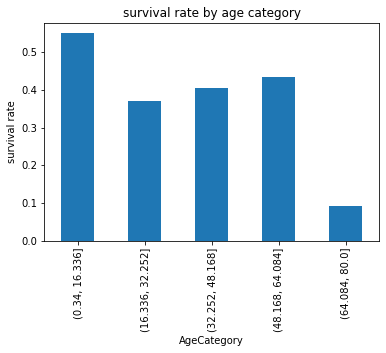

In [88]:
age_survival_table.plot(kind="bar", ylabel="survival rate", title="survival rate by age category")

In [43]:
age_survival_table2= pd.crosstab(tc['AgeCategory'], tc['Survived'])
age_survival_table2

Survived,0,1
AgeCategory,,
"(0.34, 16.336]",45,55
"(16.336, 32.252]",218,128
"(32.252, 48.168]",112,76
"(48.168, 64.084]",39,30
"(64.084, 80.0]",10,1


<AxesSubplot:title={'center':'no of deaths and survivals by ageCategory'}, xlabel='AgeCategory', ylabel='no of passengers'>

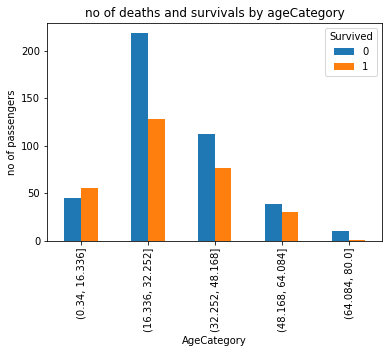

In [87]:
age_survival_table2.plot(kind="bar", ylabel="no of passengers", title="no of deaths and survivals by ageCategory")

<h3 style="color:red">The survival rate is highest among the youngest group (between the age of 3 months and 16 years and it is the worst in the oldest group (between the age of 60 and 80), there does not seem to be a pattern in the other 3 groups. For example, the second youngest group has a lower survival rate than the third and fourth youngest group.</h3>

In [46]:
stats.chi2_contingency(age_survival_table2)

(15.229524960081086,
 0.0042480926672647905,
 4,
 array([[ 59.3837535 ,  40.6162465 ],
        [205.46778711, 140.53221289],
        [111.64145658,  76.35854342],
        [ 40.97478992,  28.02521008],
        [  6.53221289,   4.46778711]]))

<h3 style="color:red">The chi-square value is another way to prove the association between 2 categorical variables and the above method shows that degree of freedom is 4 so the decision point (9.49) and when we find out that the chi-square value (15.22) is a bit greater than the decision point, we can conclude that there could be a relationship between the age and survival rate but it is not a strong one which confirms my findinds based on the graphs</h3>

### Github & D2L Submissions
Please create a **public** github repo and submit your answers on both **public github** and on **D2L**. Please include the link to your github repo in your submission. 

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

Here is another great resource for organizing your folder and code on github. Reso

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 